<b><h1>CLASSIFICATION OF TOXIC COMMENTS FROM WIKIPEDIA COMMENTS GALLERY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')
#import warnings
#warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv(r'C:\Users\CSC\Desktop\jup\Excelr Projects\Project 2\train.csv',encoding='latin1',on_bad_lines='skip',lineterminator='\n')

In [ ]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164094 entries, 0 to 164093
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             164093 non-null  object
 1   comment_text   160602 non-null  object
 2   toxic          159691 non-null  object
 3   severe_toxic   159464 non-null  object
 4   obscene        159346 non-null  object
 5   threat         159263 non-null  object
 6   insult         159225 non-null  object
 7   identity_hate  158888 non-null  object
dtypes: object(8)
memory usage: 10.0+ MB


In [ ]:
data.isnull().sum()

id                  1
comment_text     3492
toxic            4403
severe_toxic     4630
obscene          4748
threat           4831
insult           4869
identity_hate    5206
dtype: int64

In [ ]:
data.shape

(164094, 8)

In [ ]:
data.iloc[125:160,:]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
125,004f981460421bdf,"Hi, I am new to wikipedia. Read up on pandemic...",0,0,0,0,0,0
126,004fb9f655230909,Should say something about his views as an edu...,0,0,0,0,0,0
127,004fd4fb5c47c29f,"""==Sandbox==\nDon't take the template out of t...",0,0,0,0,0,0
128,0050cb3bc226f94e,"heh, it's a bit of a copy of Wikipedia:WikiPro...",0,0,0,0,0,0
129,00510c3d06745849,"Ahh, Hello Witzeman \n\n203.92.84.161 \nSymbo...",NaN,NaN,NaN,NaN,NaN,NaN
130,Characters: Á á   É é Í í 9 : C D Ó ó T U Z ...,- N O l m,NaN,NaN,NaN,NaN,NaN,NaN
131,  ! 0 1 { |     . / ê ë r s \...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,Greek:  ¬  ­  ®  ¯  Ì  Í  Î  ±  ² ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,Cyrillic:  0  1  2  3    S  4  R ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,"Z > ? @ ! A "" B [ # C  ^ $ D % E...",L - M . N / O,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_2 = data.copy()

<b><h1>DATA CLEANING

In [ ]:
#Dropping Null Values
data_3 = data_2.dropna()

In [ ]:
data_3

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
164089,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
164090,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
164091,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
164092,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
#pd.set_option('display.max_colwidth', None)
data_3.iloc[160:200,:]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
174,0063a8786a7034fc,"""== Attributing and classifying of personaliti...",0,0,0,0,0,0
175,0063dd8f202a698a,"""\n\nActually, direct quotes that aren't in qu...",0,0,0,0,0,0
176,0063f66706c20dfa,"""\nKatelyn Faber\nCould you weigh in at the bo...",0,0,0,0,0,0
177,0063f77040fbc7d4,Fradulent claim \n\nI am most certainly not a ...,0,0,0,0,0,0
178,006493e4e9c89cab,That is quick if we only limit the discussion ...,0,0,0,0,0,0
179,0066dcf7d9ecd360,"""\n\n 123 18:38, July 18, 2005 (UTC)\n\nP.S. F...",0,0,0,0,0,0
180,006774d59329b7bd,"And, of course, Peiser is more than just a soc...",0,0,0,0,0,0
181,006854d70298693e,"Hi \n\nHi, good day.\n\nMy deepest apologies t...",0,0,0,0,0,0
182,00686325bcc16080,"You should be fired, you're a moronic wimp who...",1,0,0,0,1,0
183,0069bf2d6881ad29,"It looks to me like he is violating WP:NPA, bu...",0,0,0,0,0,0


In [ ]:
data_3['toxic'].value_counts()

toxic
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               143587
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
data_3['obscene'].value_counts()

obscene
0                                                                                                                                                                                                                                                                                                                                                               150425
1                                                                                                                                                                                                                                                                                                                                                                 8441
 in fact                                                                                                                                                                                                                                                                          

In [ ]:
data_3[data_3['toxic'].isin(['0', '1']) == False]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
12,Thanks for uploading Image:Wonju.jpg. I notice...,so the copyright status is unclear. If you di...,then you will need to specify the owner of th...,then a link to the website from which it was ...,together with a restatement of that website's...,is usually sufficient information. However,if the copyright holder is different from the...,then their copyright should also be acknowled...
136,= My Famous Article ==witze happiness  wikip...,regardless of race,age,character or knowledge. The outside world kno...,and the honour of the Witzeman. For those who...,it has been said to have been a great honour,although the qualities needed for the job hav...,until they are called by former Witzemans via...
12894,It seems that people are using this page to pr...,or own obscure tastes,"which they find """"""""super."""""""" I agree with t...",and will weed out some of the lesser-known acts,and those featuring lesser-known musicians. F...,if you believe that I'm wrong. The preceding...,December 14,2004 (UTC)
13239,Twitter and Wikia usually are not reliable so...,especially the latter,like Wikipedia. As I had said,if you can find a reliable source,like a news agency,that discusses the hackings in detail,then it might be considered. Blog posts from ...,profiles and tweets are not enough. 24Mati
13687,Take a chill pill. My mistake,perhaps it should have been no game trivia,item 6 instead. Also,"your revision """"""""You can also unlock several...",but wikipedia users are total fags and think ...,doesn't really contribute to the article,violates npa and is misleading (it's guidelin...,"so I reverted it. Thanks! ©"""
15972,The New Catholic Encyclopedia (1967,Vol. IX,"p. 337) admits regarding the Greek words a""de...",used at Matthew 13:55,56,that these have the meaning of full blood br...,motivated by the Churchs traditional faith i...,wrote a tract against Helvidius (A.D. 383) in...
16858,As there are Spaniards in the movie,it's sure that the movie doesn't take place b...,you can't guarantee what is the exact year. T...,but they have not to be the first Spaniards i...,just the first in the lands of the Mayan city...,and later these people could extend the sickn...,but their Black Plague destroyed 1/3 of the E...,and the Incas fell on civil war because an ep...
29969,Next time,"type """"""""http://en.wikipedia.org/wiki/"""""""" on...","then type """"""""User:Esskater11/*USERBOX NAME*""...","or """"""""Template:*USERBOX NAME*""""""""",preferably if the userbox's topic is 'univers...,well,the name of the userbox,"and there you go! '/PenaltyKillah(discuss""edi..."
38483,I see that you already have an archive,therefore you can just edit this page,cut out the bit you want to archive,save the page,then open up User talk:Falcon8765/Archive 1,go to the end,paste it in there,save that.
40992,"9. """"""""It is also a clear fact that the system...",be the guard,stance,and striking techniques,"is identical to Muay Thai."""""""" This is actual...",tomoi is the same as muay Thai and Muay Lao. ...,that doesn't necessarily mean tomoi came from...,they may all have their origins in Cambodia o...


In [ ]:
data_4 = data_3.drop(data_3[data_3['toxic'].isin(['0', '1']) == False].index, axis=0)
data_4

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
164089,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
164090,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
164091,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
164092,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
data_4.shape

(158866, 8)

In [ ]:
data_4[data_4['severe_toxic'].isin(['0', '1']) == False]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [ ]:
data_4[data_4['obscene'].isin(['0', '1']) == False]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [ ]:
data_4[data_4['threat'].isin(['0', '1']) == False]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [ ]:
data_4[data_4['insult'].isin(['0', '1']) == False]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [ ]:
data_4[data_4['identity_hate'].isin(['0', '1']) == False]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [ ]:
print(f"First_id_length={len(data_4['id'][0])},Second_id_length={len(data_4['id'][1])},Third_id_length={len(data_4['id'][2])}")

First_id_length=16,Second_id_length=16,Third_id_length=16


In [ ]:
#pd.set_option('display.max_rows', None)
data_4[data_4['id'].str.len() != 16]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
801,Well,"there was""",0,0,0,0,0,0
1716,I can only assume because he is one of you and...,"that guy (you? should be blocked. """"""",1,0,1,0,1,1
2835,""",0,0,0,0,0,0\n0777b13c678927d8""","""First off, modern computer-generated ornate r...",0,0,0,0,0,0
5402,""",0,0,0,0,0,0\n0e33caffde293a89""",i just got on here a little while ago i am loo...,0,0,0,0,0,0
6206,""",0,0,0,0,0,0\n10648aa79db1aac2""",Add TypeScript? \n\nHow about adding TypeScrip...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
157085,According to History's copyright page,the content that you added is most certainly ...,0,0,0,0,0,0
157778,""",0,0,0,0,0,0\n9c2ae5e27b1f7d83""",Your Bondpedia has the potential to cover ever...,0,0,0,0,0,0
160848,If you just go and include them again,"yes it does.""",0,0,0,0,0,0
163003,@Powergate: I thought I said to remove yoursel...,it has been known to happen. You aren't help...,0,0,0,0,0,0


In [ ]:
data_5 = data_4.copy()  # Create a copy if you want to keep the original DataFrame
data_5.drop(data_5[data_5['id'].str.len() != 16].index, axis=0, inplace=True)
data_5

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
164089,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
164090,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
164091,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
164092,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
data_5

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
164089,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
164090,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
164091,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
164092,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
data_5['toxic'].value_counts()

toxic
0    143424
1     15265
Name: count, dtype: int64

In [ ]:
data_5['severe_toxic'].value_counts()

severe_toxic
0    157095
1      1594
Name: count, dtype: int64

In [ ]:
data_5.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = text.strip(' ') # Removing leading and trailing white spaces
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub('^[a-zA-Z]+',  " ",str(text))# Search for all non-letters,Replace all non-letters with spaces

    return text

In [ ]:
data_6 = data_5.copy()
data_6['comment_text'] = data_6['comment_text'].apply(lambda text : clean_text(text))

In [ ]:
data_6

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,why the edits made under my username hardcor...,0,0,0,0,0,0
1,000103f0d9cfb60f,he matches this background colour im seeming...,0,0,0,0,0,0
2,000113f07ec002fd,man im really not trying to edit war its jus...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cant make any real suggestions on impr...,0,0,0,0,0,0
4,0001d958c54c6e35,sir are my hero any chance you remember what...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
164089,ffe987279560d7ff,for the second time of asking when your view...,0,0,0,0,0,0
164090,ffea4adeee384e90,should be ashamed of yourself that is a ho...,0,0,0,0,0,0
164091,ffee36eab5c267c9,umm theres no actual article for prostitut...,0,0,0,0,0,0
164092,fff125370e4aaaf3,it looks like it was actually you who put on...,0,0,0,0,0,0


<b><h1>VISUALIZATION

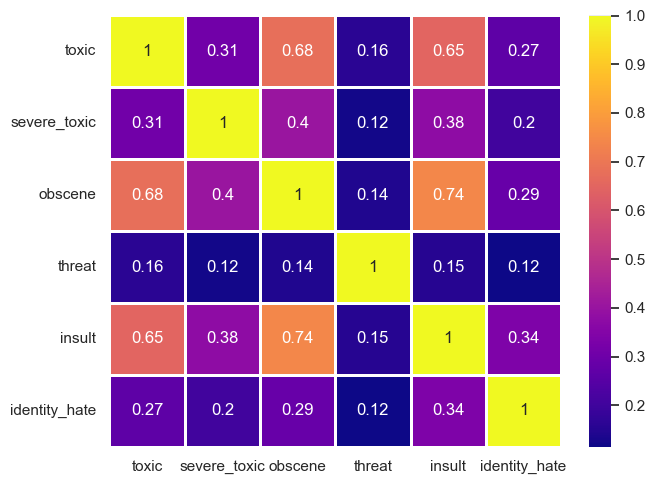

In [ ]:
#Checking for realtionship between target faetures

cols = data_6.drop(['id','comment_text'],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(cols.corr(),annot=True,cmap=plt.cm.plasma,linewidths=2,linecolor='white')
plt.tight_layout()
plt.show()

<b>From Correlation matrix we can say there is chances of toxic comments to be both obscene and insult and also obscene comments to more insulting

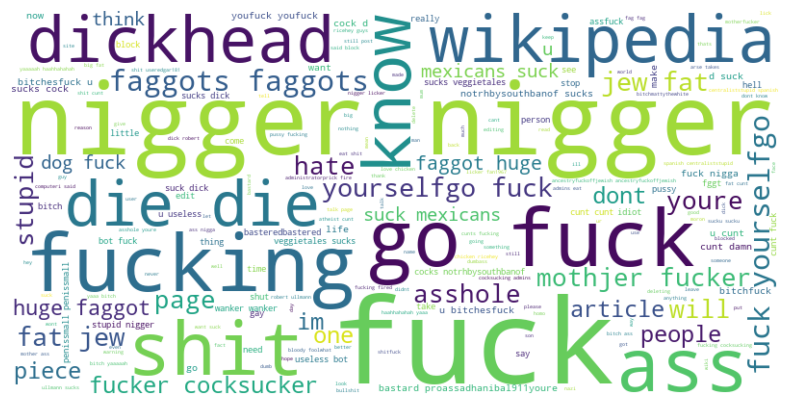

In [ ]:
#Let us visualize what makes toxic comments-------->obscene,insult and

from wordcloud import WordCloud

num = data_6[(data_6['toxic'] == '1') & (data_6['obscene'] == '1') & (data_6['insult'] == '1')]
text_data = num['comment_text'].str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

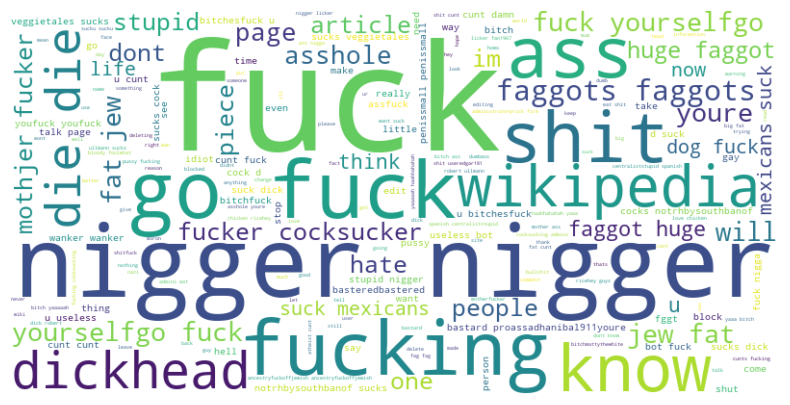

In [ ]:
#Let us visualize what makes obscene------------>insult

num_2 = data_6[(data_6['obscene'] == '1') & (data_6['insult'] == '1')]
text_data_2 = num_2['comment_text'].str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data_2)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

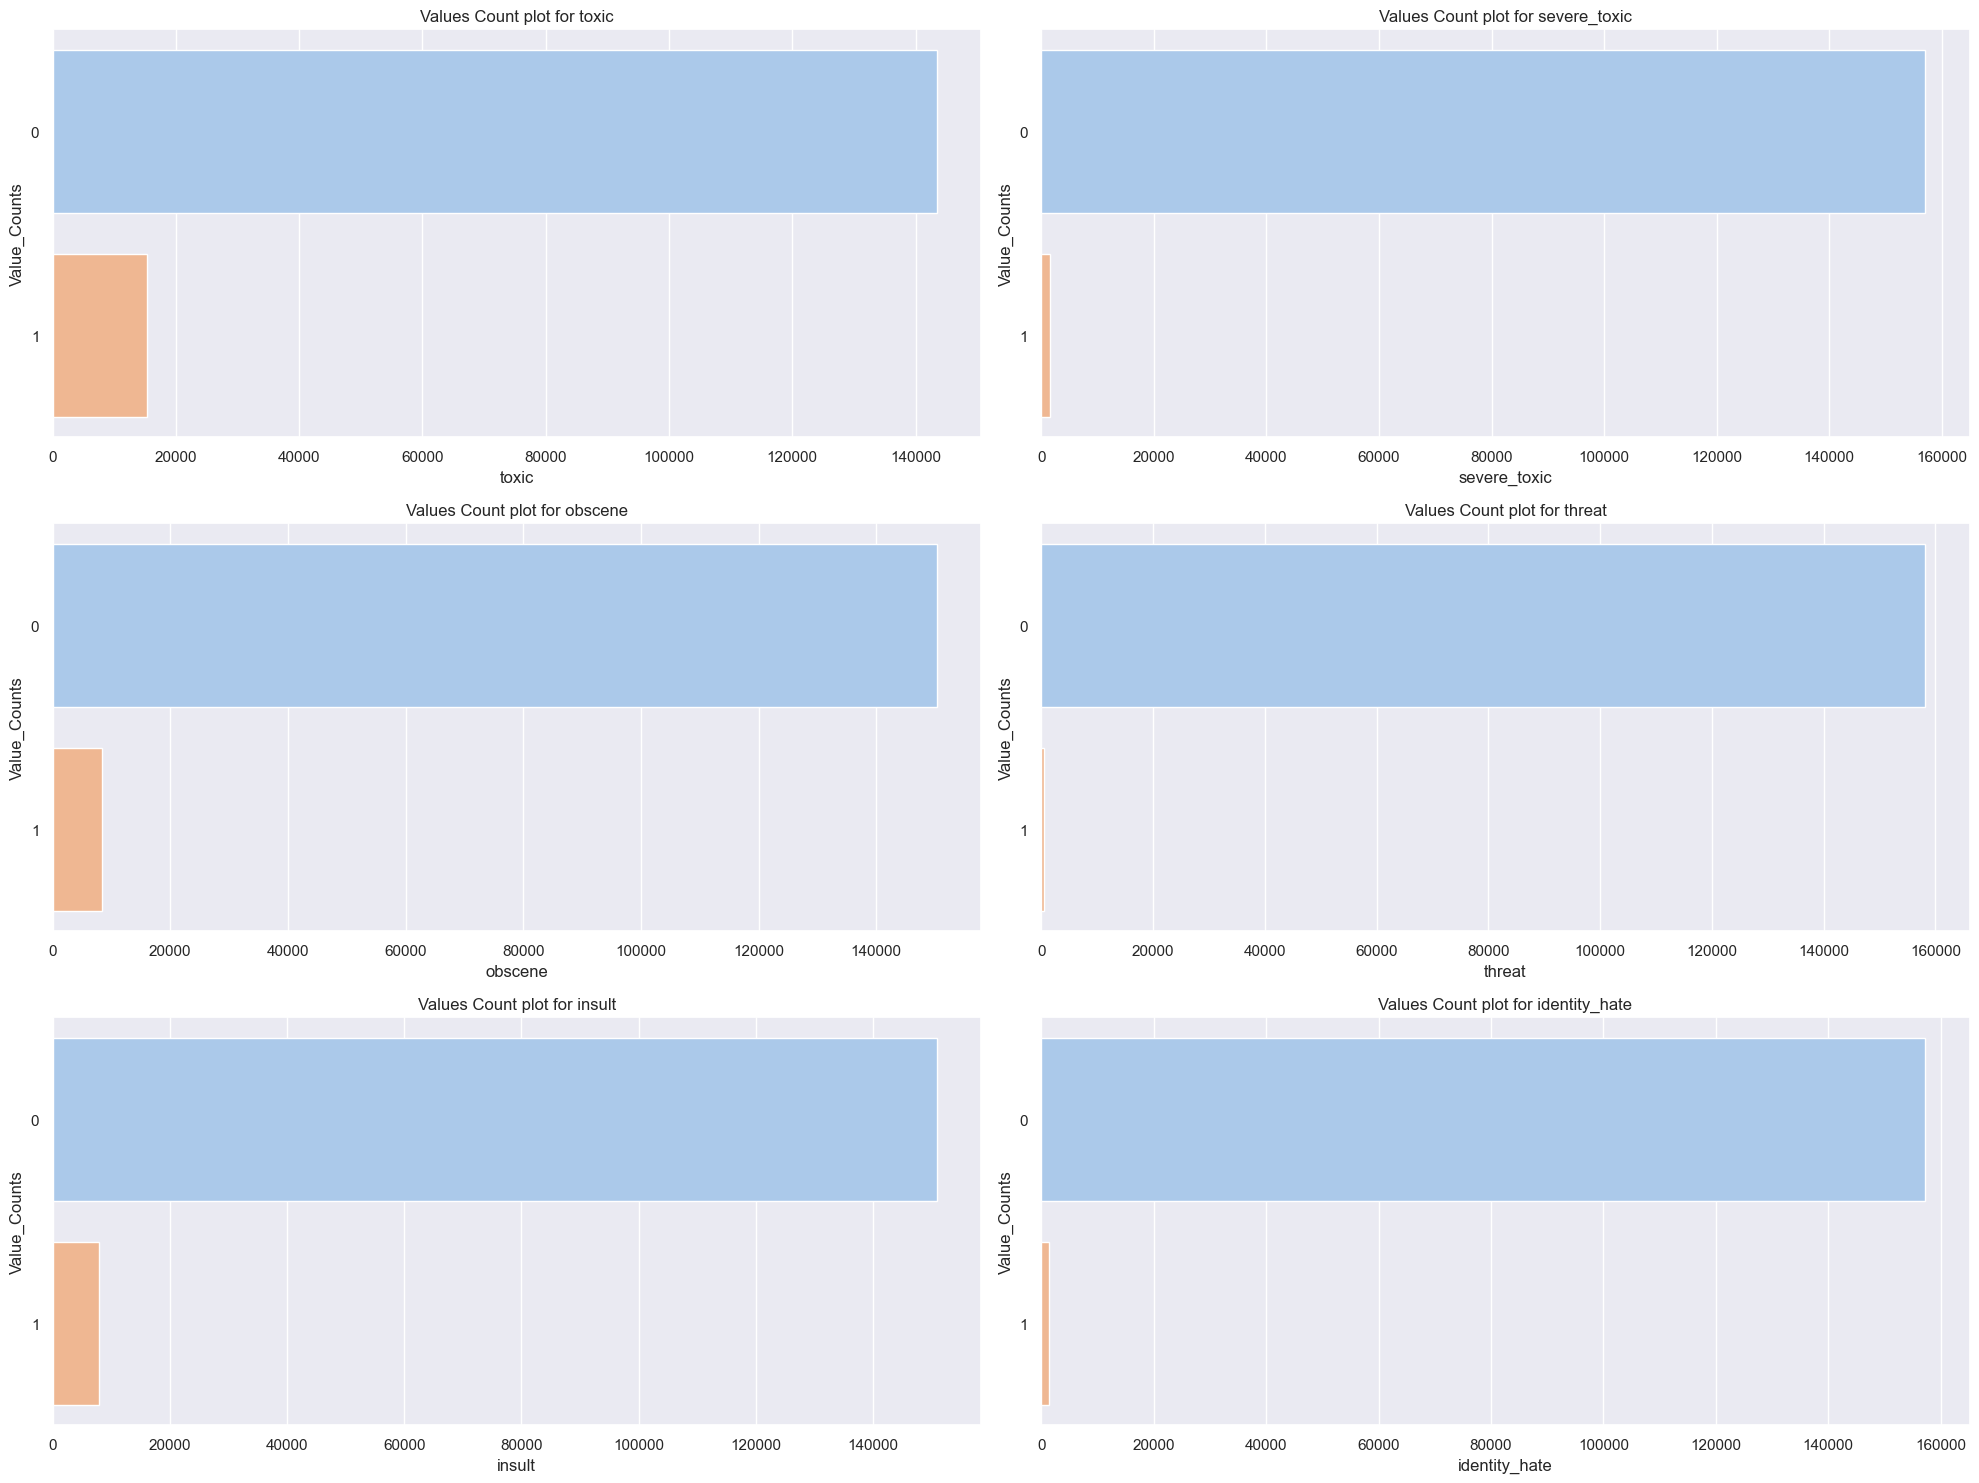

In [ ]:
#Visualizing number of comments classified as their respective lables

plt.figure(figsize=(20,15))
for i,n in enumerate(cols,start=1):
    plt.subplot(3,2,i)
    sns.countplot(y=cols[n],data=cols,palette='pastel')
    plt.xlabel(n)
    plt.ylabel('Value_Counts')
    plt.title(f'Values Count plot for {n}')
plt.tight_layout()
plt.show()

<b>As we can see the number of comments concerning to threat as a label is very low compared to other labels.This may lead to a situation where our model may not learn to identity threatfull comments successfully when compared to other labels.

In [ ]:
cols['threat'].value_counts()

threat
0    158211
1       478
Name: count, dtype: int64

C:\Users\CSC\AppData\Local\Temp\ipykernel_7680\2601743837.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lens)


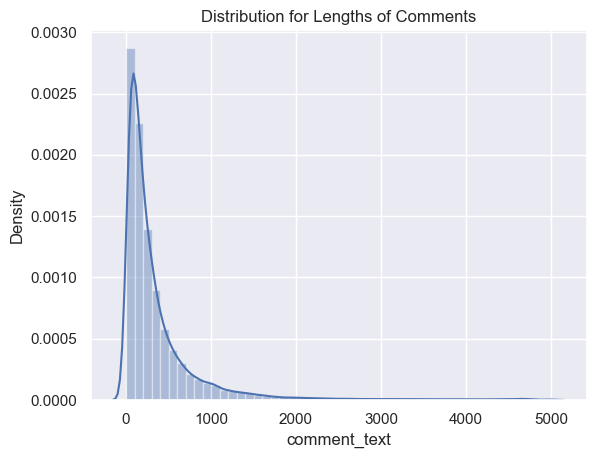

In [ ]:
#Visualizing the distribution of length of comments
lens = data_6.comment_text.str.len()
sns.distplot(lens)
plt.title("Distribution for Lengths of Comments")
plt.show()

<b>This indicates that most of the comments are of lengths less than 500, while some are of length 5000 as well.